In [1]:
import glob
import io
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def get_pidstat_df(reports_dir, nodes):
    correct_log_header = "Time          UID       PID    %usr %system  %guest   %wait    %CPU   CPU  minflt/s  majflt/s     VSZ     RSS   %MEM   kB_rd/s   kB_wr/s kB_ccwr/s iodelay  Command\n"
    del_col = ["Command", "PID", "%system","%guest", "%wait"]
    pidstat_df = pd.DataFrame()
    
    for node_name in nodes:
        filepath = f"{reports_dir}/{node_name}/pidstat-{node_name}.csv.log"

        # change header since Pandas will not be able to parse it correctly
        with open(filepath, "r") as fh:
            lines = fh.readlines()
        lines[0] = correct_log_header
        # store it in a temporary file object so we don't need to
        # modify the (potentially protected) original file
        data = io.StringIO("".join(lines))

        df = pd.read_fwf(data)
        df["duration"] = df["Time"] - df["Time"][0]
        df["node"] = node_name
        # for c in del_col:
        #        del df[c]
        pidstat_df = pd.concat([pidstat_df, df], ignore_index=True)
    
    # augment totals
    totals = pidstat_df.groupby(["Time", "node"]).sum().reset_index()
    totals["Command"] = "total (abs)"
    totals["duration"] = totals["Time"] - totals["Time"][0]
    pidstat_df = pd.concat([pidstat_df, totals], ignore_index=True).sort_values(["Time", "node"])
    return pidstat_df

# Szenario `vicinity`

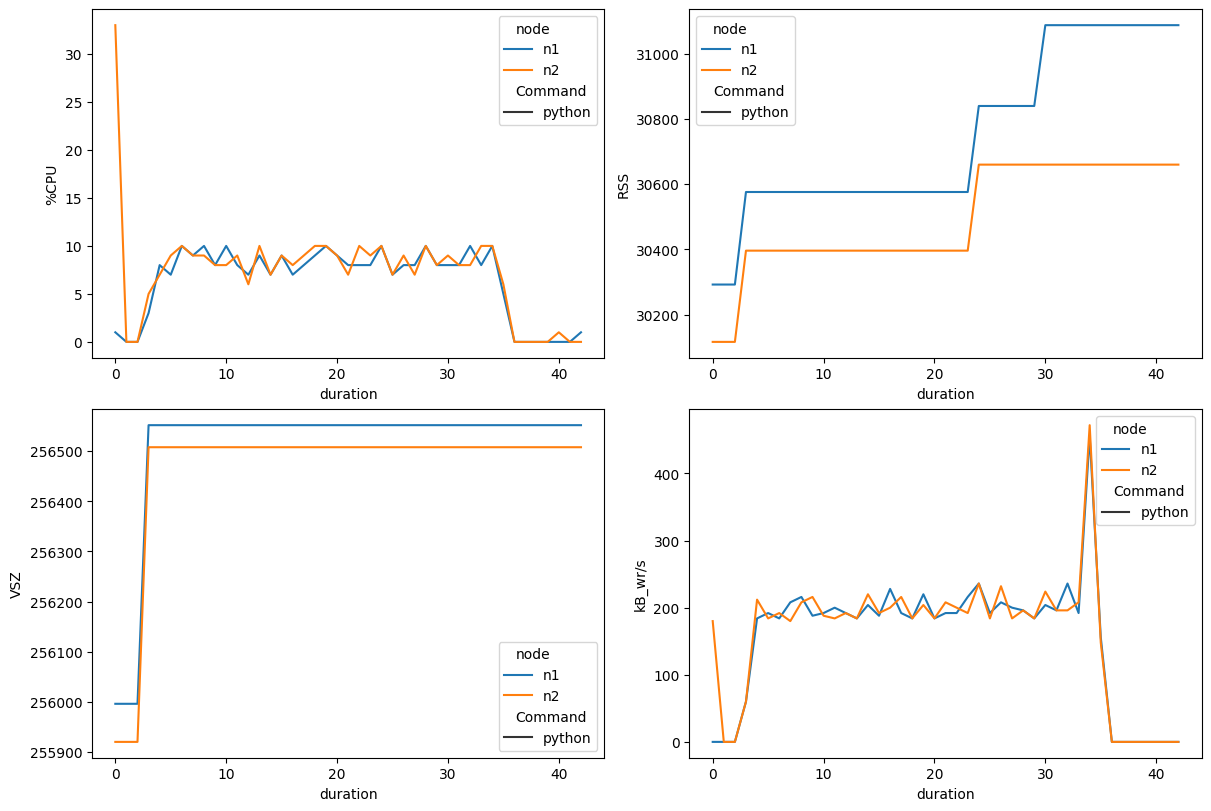

In [15]:
reports_dir = "vicinity/results-vicinity-1662842855"  # sorted(glob.glob("vicinity/results*"))[-1] # get latest results
nodes = ["n1", "n2"]
processes = ["python", "dtnd"]
pidstat_df = get_pidstat_df(reports_dir, nodes)

cols, rows = [2, 2]

fig, ax = plt.subplots(rows, cols, figsize=(12, 8), constrained_layout=True)
for i, g in enumerate(["%CPU", "RSS", "VSZ", "kB_wr/s"]):
    sns.lineplot(
        data=pidstat_df[pidstat_df["Command"].isin(processes)],
        x="duration", y=g, hue="node", style="Command", ax=ax[i // rows][i % cols])

In [16]:
pidstat_df

,Time,UID,PID,%usr,%system,%guest,%wait,%CPU,CPU,minflt/s,...,VSZ,RSS,%MEM,kB_rd/s,kB_wr/s,kB_ccwr/s,iodelay,Command,duration,node
0,1662842860,0,41,1.0,0.0,0.0,0.0,1.0,5,2.0,...,255996,30292,0.09,0.0,0.0,0.0,0,python,0,n1
86,1662842860,0,41,1.0,0.0,0.0,0.0,1.0,5,2.0,...,255996,30292,0.09,0.0,0.0,0.0,0,total (abs),0,n1
43,1662842860,0,41,31.0,2.0,0.0,0.0,33.0,2,15341.0,...,255920,30116,0.09,0.0,180.0,32.0,0,python,0,n2
87,1662842860,0,41,31.0,2.0,0.0,0.0,33.0,2,15341.0,...,255920,30116,0.09,0.0,180.0,32.0,0,total (abs),0,n2
1,1662842861,0,41,0.0,0.0,0.0,0.0,0.0,5,0.0,...,255996,30292,0.09,0.0,0.0,0.0,0,python,1,n1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,1662842901,0,41,0.0,0.0,0.0,0.0,0.0,2,0.0,...,256508,30660,0.09,0.0,0.0,0.0,0,total (abs),41,n2
42,1662842902,0,41,1.0,0.0,0.0,0.0,1.0,0,0.0,...,256552,31088,0.09,0.0,0.0,0.0,0,python,42,n1
170,1662842902,0,41,1.0,0.0,0.0,0.0,1.0,0,0.0,...,256552,31088,0.09,0.0,0.0,0.0,0,total (abs),42,n1
85,1662842902,0,41,0.0,0.0,0.0,0.0,0.0,2,0.0,...,256508,30660,0.09,0.0,0.0,0.0,0,python,42,n2


# Szenario `1k`

Notiz: n1, n2, n3 nur die Farbe, keine Linie in Legende

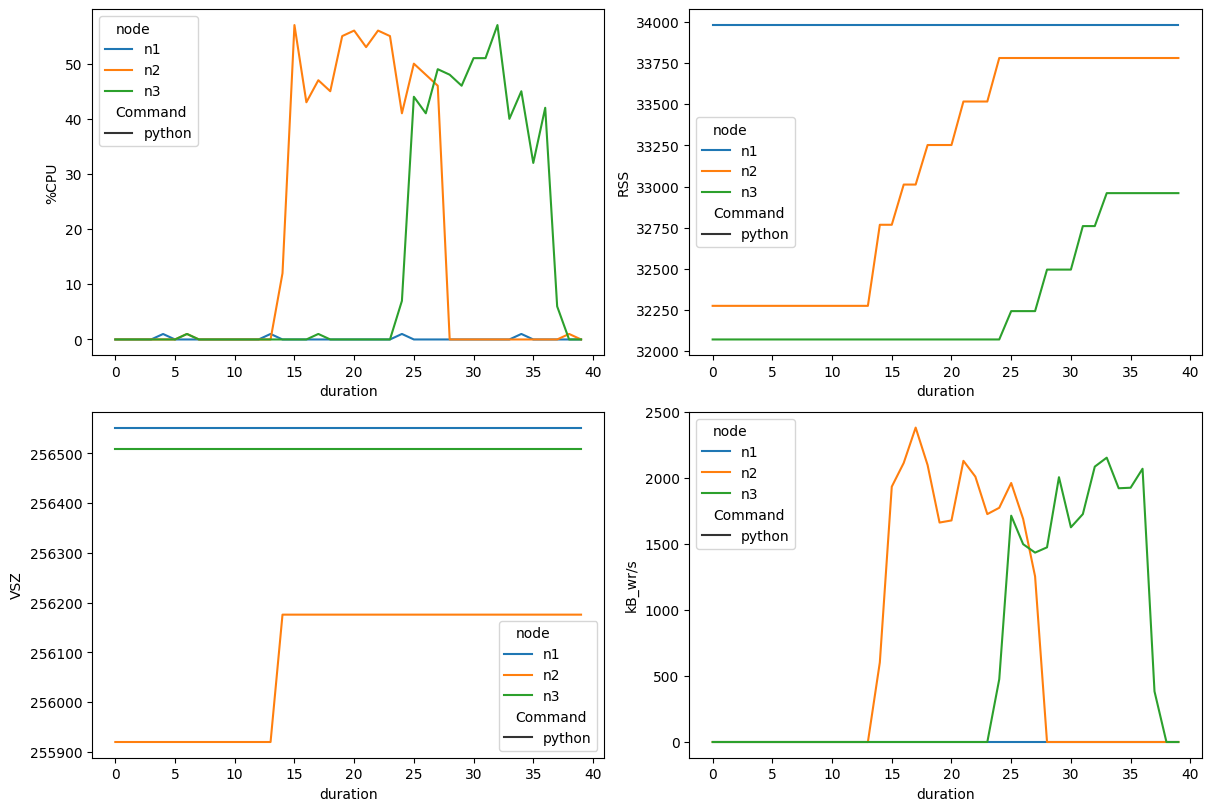

In [12]:
reports_dir = "1k/results-1k-1662845364" # sorted(glob.glob("1k/results*"))[-1] # get latest results
nodes = ["n1", "n2", "n3"]
processes = ["python", "dtnd"]
pidstat_df = get_pidstat_df(reports_dir, nodes)

cols, rows = [2, 2]

fig, ax = plt.subplots(rows, cols, figsize=(12, 8), constrained_layout=True)
for i, g in enumerate(["%CPU", "RSS", "VSZ", "kB_wr/s"]):
    sns.lineplot(
        data=pidstat_df[pidstat_df["Command"].isin(processes)],
        x="duration", y=g, hue="node", style="Command", ax=ax[i // rows][i % cols])

In [64]:
pidstat_df

,Time,UID,PID,%usr,%system,%guest,%wait,%CPU,CPU,minflt/s,...,VSZ,RSS,%MEM,kB_rd/s,kB_wr/s,kB_ccwr/s,iodelay,Command,duration,node
0,1662845594,0,41,0.0,0.0,0.0,0.0,0.0,2,0.0,...,256552,33980,0.1,0.0,0.0,0.0,0,python,0,n1
120,1662845594,0,41,0.0,0.0,0.0,0.0,0.0,2,0.0,...,256552,33980,0.1,0.0,0.0,0.0,0,total (abs),0,n1
40,1662845594,0,41,0.0,0.0,0.0,0.0,0.0,2,0.0,...,255920,32276,0.1,0.0,0.0,0.0,0,python,0,n2
121,1662845594,0,41,0.0,0.0,0.0,0.0,0.0,2,0.0,...,255920,32276,0.1,0.0,0.0,0.0,0,total (abs),0,n2
80,1662845594,0,41,0.0,0.0,0.0,0.0,0.0,4,0.0,...,256508,32072,0.1,0.0,0.0,0.0,0,python,0,n3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,1662845633,0,41,0.0,0.0,0.0,0.0,0.0,2,0.0,...,256552,33980,0.1,0.0,0.0,0.0,0,total (abs),39,n1
79,1662845633,0,41,0.0,0.0,0.0,0.0,0.0,2,0.0,...,256176,33780,0.1,0.0,0.0,0.0,0,python,39,n2
238,1662845633,0,41,0.0,0.0,0.0,0.0,0.0,2,0.0,...,256176,33780,0.1,0.0,0.0,0.0,0,total (abs),39,n2
119,1662845633,0,41,0.0,0.0,0.0,0.0,0.0,4,0.0,...,256508,32960,0.1,0.0,0.0,0.0,0,python,39,n3


<AxesSubplot:xlabel='duration', ylabel='%CPU'>

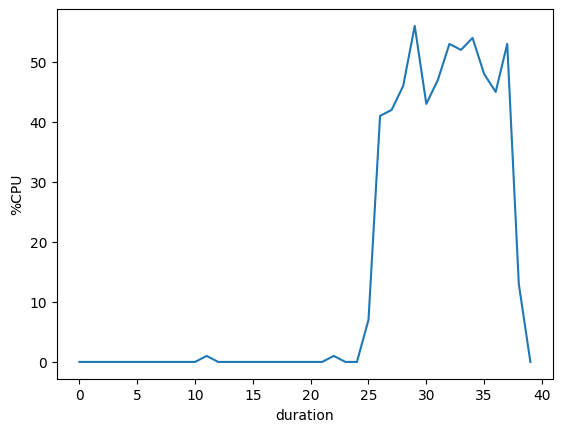

In [158]:
show_node = "n3"
show_node_df = pidstat_df[pidstat_df["node"] == show_node]
sns.lineplot(data=show_node_df, x="duration", y="%CPU")

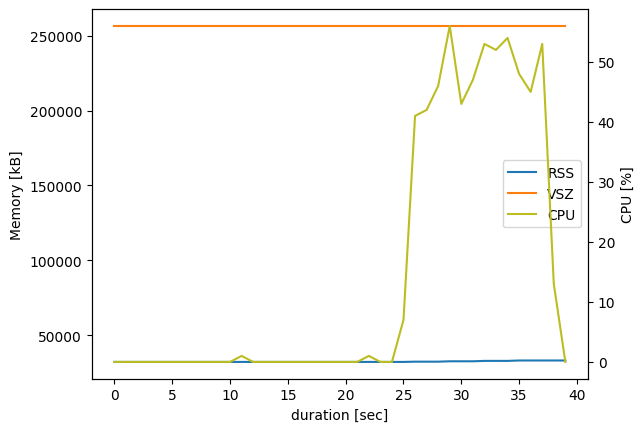

In [159]:
dfm = show_node_df[["duration", "RSS", "VSZ"]].melt("duration", var_name="metric", value_name="value")

g1 = sns.lineplot(x="duration", y="value", hue="metric", data=dfm)
g2 = sns.lineplot(x="duration", y="%CPU", data=show_node_df[["duration", "%CPU"]], ax=g1.axes.twinx(), color="C8", label="CPU")

g1.set_ylabel("Memory [kB]")
g1.set_xlabel("duration [sec]")
g2.set_ylabel("CPU [%]")

h1, l1 = g1.get_legend_handles_labels()
h2, l2 = g2.get_legend_handles_labels()
g1.legend(h1+h2, l1+l2)
g2.legend().remove()

In [37]:
a

,t,m1,m2,n
0,0,1,5,a
1,0,2,6,b
4,0,3,11,total (abs)
2,1,3,7,a
3,1,4,8,b
5,1,7,15,total (abs)


In [43]:
a = pd.DataFrame(data={"t": [0, 0, 1, 1], "m1": [1,2,3,4], "m2": [5,6,7,8], "n": ["a", "b", "a", "b"]})

b = a.groupby("t").sum().reset_index()
b["n"] = "total (abs)"

a = pd.concat([a, b], ignore_index=True).sort_values(["t", "n"])
a

,t,m1,m2,n
0,0,1,5,a
1,0,2,6,b
4,0,3,11,total (abs)
2,1,3,7,a
3,1,4,8,b
5,1,7,15,total (abs)
